In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
filepath=os.getcwd()+'/andrew_ng_data/exercise1'
data=pd.read_csv(filepath, header=None, names=['Population','Profit'])
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
5,8.3829,11.88600
6,7.4764,4.34830
7,8.5781,12.00000
8,6.4862,6.59870
9,5.0546,3.81660


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


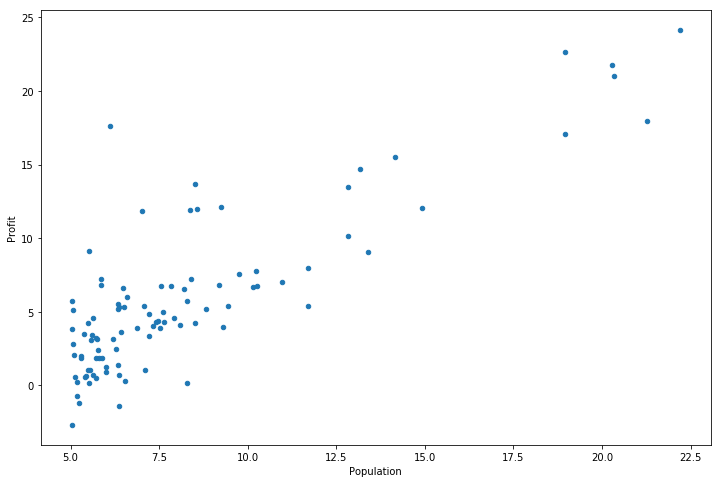

In [4]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))

In [5]:
def computeCost(X,y,theta):
    inner=np.power((X*theta.T)-y,2)
    return np.sum(inner)/(2*(len(X)))

In [6]:
data.insert(0,'Ones',1)

In [7]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
cols=data.shape[1]# returns 3(number of columns)
X=data.iloc[:,0:cols-1]# training data
y=data.iloc[:,cols-1:cols]# target variable

In [9]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [11]:
X.shape

(97, 2)

In [12]:
y.shape

(97, 1)

In [13]:
X=np.matrix(np.array(X))
X.shape

(97, 2)

In [14]:
y=np.matrix(np.array(y))
y.shape

(97, 1)

In [15]:
theta=np.matrix(np.array([0,0]))
theta.shape

(1, 2)

In [16]:
computeCost(X,y,theta)

32.072733877455676

In [17]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [18]:
alpha=0.01
iterations=1000

In [19]:
g,cost=gradientDescent(X,y,theta,alpha,iterations)
g

matrix([[-3.24140214,  1.1272942 ]])

In [20]:
computeCost(X,y,g)

4.515955503078912

In [21]:
x=np.linspace(data.Population.min(),data.Population.max(),100)

In [22]:
f=g[0,0]+(g[0,1]*x)

Text(0.5,1,'Predicted Profit vs. Population Size')

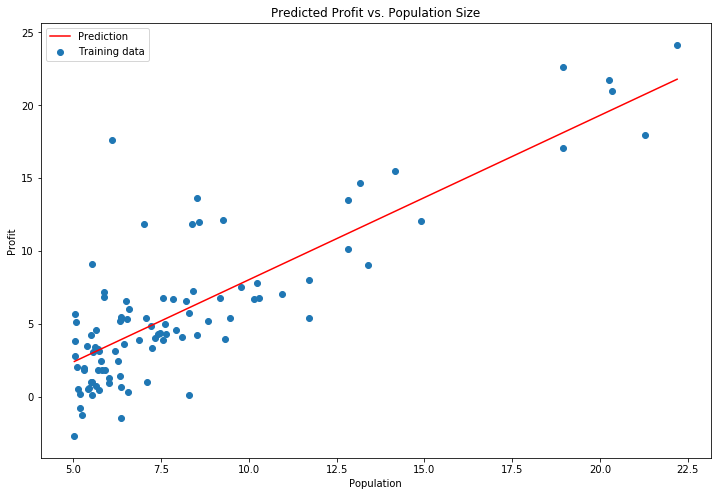

In [32]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5,1,'Error vs Training Epoch')

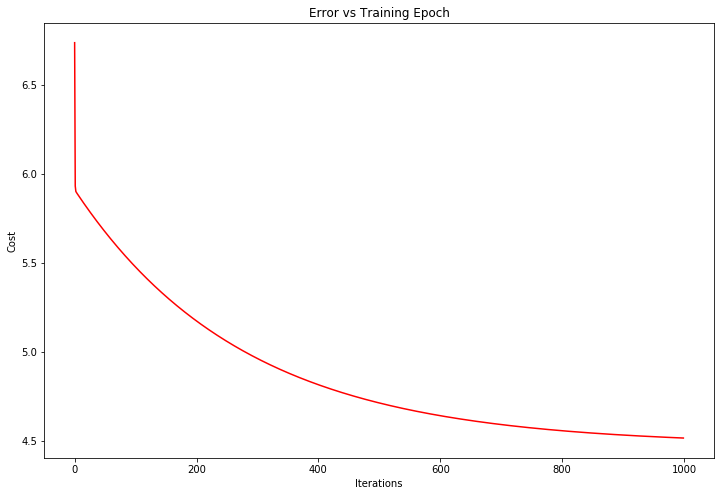

In [34]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

# predict the price that a house will sell for.
# we're given both the size of the house (in sq.ft) and number of bedrooms

In [40]:
path1=os.getcwd()+'/andrew_ng_data/exercise1_1'
data1=pd.read_csv(path1,header=None,names=['Size','Bedrooms','Price'])
data1.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [41]:
data1.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [43]:
data1=(data1 - data1.mean())/(data1.std())
data1.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [44]:
# add ones column
data1.insert(0,'Ones',1)
data1.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [49]:
# set X and y
cols=data1.shape[1]
cols

4

In [50]:
# only select from columns
X1=data1.iloc[:,0:cols-1]
y1=data1.iloc[:,cols-1:cols]

In [51]:
X1=np.matrix(X1.values)

In [52]:
y1=np.matrix(y1.values)

In [54]:
# initialize theta
theta1=np.matrix(np.array([0,0,0]))
theta1

matrix([[0, 0, 0]])

In [55]:
#performing linear regression
g1, cost1=gradientDescent(X1,y1,theta1,alpha,iterations)

In [56]:
g1

matrix([[-5.54461914e-17,  8.78503652e-01, -4.69166570e-02]])

In [57]:
cost1

array([0.4805491 , 0.47198588, 0.46366462, 0.45557814, 0.44771948,
       0.44008189, 0.43265881, 0.42544389, 0.41843096, 0.41161404,
       0.40498735, 0.39854524, 0.39228228, 0.38619317, 0.38027278,
       0.37451612, 0.36891839, 0.36347488, 0.35818107, 0.35303254,
       0.34802503, 0.34315438, 0.33841659, 0.33380775, 0.32932407,
       0.3249619 , 0.32071767, 0.31658793, 0.31256934, 0.30865863,
       0.30485268, 0.30114841, 0.29754287, 0.29403318, 0.29061655,
       0.28729027, 0.28405173, 0.28089837, 0.27782772, 0.27483739,
       0.27192505, 0.26908845, 0.26632541, 0.26363379, 0.26101154,
       0.25845666, 0.25596722, 0.25354134, 0.25117719, 0.248873  ,
       0.24662705, 0.24443769, 0.24230329, 0.24022228, 0.23819315,
       0.23621442, 0.23428466, 0.23240248, 0.23056652, 0.22877549,
       0.22702811, 0.22532316, 0.22365943, 0.22203576, 0.22045104,
       0.21890417, 0.21739409, 0.21591977, 0.21448021, 0.21307445,
       0.21170155, 0.2103606 , 0.2090507 , 0.207771  , 0.20652

In [58]:
#calculate error
computeCost(X1,y1,g1)

0.130703369607719

Text(0.5,1,'Error vs. Training epoch')

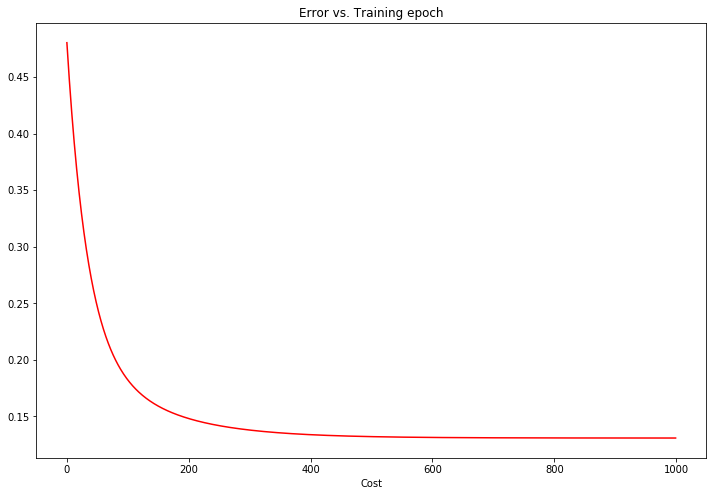

In [60]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations),cost1,'r')
ax.set_xlabel('Iterations')
ax.set_xlabel('Cost')
ax.set_title('Error vs. Training epoch')

# simple linear regression using scikit-learn

In [61]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
x=np.array(X[:,1].A1)
f=model.predict(X).flatten()

Text(0.5,1,'Predicted profit vs. Population Size')

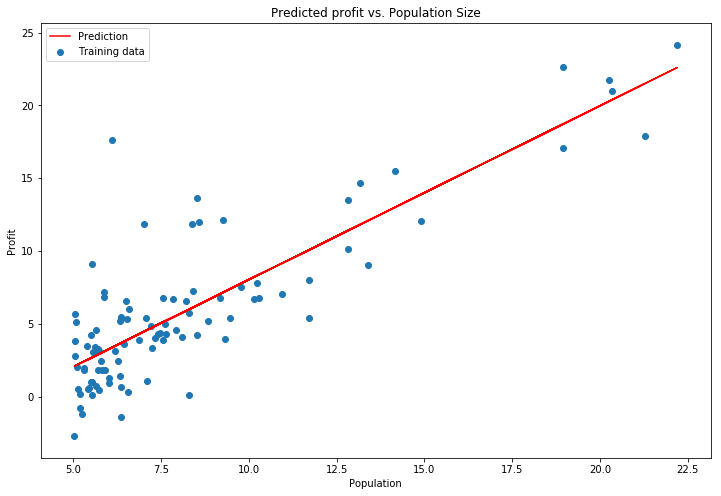

In [64]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population, data.Profit,label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted profit vs. Population Size')